In [1]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
%matplotlib widget

Log into earthaccess

In [2]:
auth = earthaccess.login(persist=True)

Check the names of the SWOT datasets available on earthaccess

In [3]:
results = earthaccess.search_datasets(keyword="swot")
for item in results:
    summary = item.summary()
    print(summary["short-name"])

SWOT_L2_HR_RiverSP_2.0
SWOT_L2_LR_SSH_2.0
SWOT_L2_HR_LakeSP_2.0
SWOT_L2_HR_PIXC_2.0
SWOT_L2_HR_Raster_2.0
SWOT_L2_NALT_IGDR_2.0
SWOT_L2_LR_SSH_1.0
SWOT_L2_NALT_GDR_2.0
SWOT_L2_HR_LakeSP_1.1
SWOT_L2_HR_RiverSP_1.1
SWOT_L2_NALT_OGDR_2.0
SWOT_L1B_HR_SLC_1.1
SWOT_L2_LR_SSH_1.1
SWOT_L1B_HR_SLC_2.0
SWOT_L2_HR_PIXCVec_2.0
SWOT_L2_HR_PIXC_1.1
SWOT_L2_NALT_IGDR_1.0
SWOT_L2_NALT_OGDR_1.0
SWOT_L2_RAD_IGDR_2.0
SWOT_L1B_LR_INTF_1.0
SWOT_L4_DAWG_SOS_DISCHARGE
SWOT_L2_HR_LakeSP_obs_2.0
SWOT_L2_HR_LakeSP_prior_2.0
SWOT_L2_HR_LakeSP_unassigned_2.0
SWOT_L2_HR_PIXCVec_1.1
SWOT_L2_HR_Raster_1.1
SWOT_L2_HR_Raster_100m_2.0
SWOT_L2_HR_Raster_250m_2.0
SWOT_L2_HR_RiverAvg_2.0
SWOT_L2_HR_RiverSP_node_2.0
SWOT_L2_HR_RiverSP_reach_2.0
SWOT_L2_LR_SSH_BASIC_2.0
SWOT_L2_LR_SSH_EXPERT_2.0
SWOT_L2_LR_SSH_UNSMOOTHED_2.0
SWOT_L2_LR_SSH_WINDWAVE_2.0
SWOT_L2_NALT_GDR_GDR_2.0
SWOT_L2_NALT_GDR_SGDR_2.0
SWOT_L2_NALT_GDR_SSHA_2.0
SWOT_L2_NALT_IGDR_GDR_1.0
SWOT_L2_NALT_IGDR_GDR_2.0
SWOT_L2_NALT_IGDR_SGDR_1.0
SWOT_L2_NALT_IGDR_

In [111]:
def get_swot_data(latmin,latmax,lonmin,lonmax,tmin,tmax):
    """
    Searches for SWOT data within the bounding box and time. Note that this doesn't work for unsmoothed data. 
    
    latmin,latmax: latitude bounds, degrees N (south is negative); floats
    lonmin, lonmax: longitude bounds, degrees E (west is negative); floats
    tmin,tmax: temporal bounds; strings of form 'yyyy-mm-dd'
    """
    bbox = (lonmin, latmin, lonmax, latmax) # lonW, latS, lonE, latN
    results = earthaccess.search_data(
        short_name="SWOT_L2_LR_SSH_EXPERT_2.0",
        bounding_box=bbox,
        temporal=(tmin,tmax))
    
    print("Number of swaths: " + str(len(results))) # not daily files, so will likely be more than # of days
    paths = earthaccess.open(results) # is there a way to choose a subset of variables here?

    return paths

### Looking for Gulf Stream Ring <3 Edward <3

In [96]:
latmin,latmax = 34,38
lonmin,lonmax = -73,-68
tmin,tmax = '2024-04-12','2024-08-05' #'2024-04-17','2024-08-04'

edward_paths = get_swot_data(latmin,latmax,lonmin,lonmax,tmin,tmax)

Number of swaths: 82


QUEUEING TASKS | :   0%|          | 0/82 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/82 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/82 [00:00<?, ?it/s]

Get all dates with SWOT swaths through the bounding box

In [97]:
dates_available = []
for i in edward_paths:
    today = str(i).split('-')[-1].split('_')[-4][0:8]
    if today not in dates_available:
        dates_available.append(today)
print(dates_available)

['20240416', '20240417', '20240418', '20240420', '20240426', '20240427', '20240428', '20240429', '20240507', '20240508', '20240509', '20240517', '20240518', '20240519', '20240523', '20240527', '20240528', '20240529', '20240530', '20240531', '20240607', '20240608', '20240609', '20240613', '20240617', '20240618', '20240619', '20240620', '20240621', '20240628', '20240629', '20240630', '20240704', '20240708', '20240709', '20240710', '20240711', '20240712', '20240719', '20240720', '20240721', '20240725', '20240729', '20240730', '20240801']


Get data from a specific date

In [104]:
date_requested = '20240508'

ind = 0 
for i in edward_paths:
    today = str(i).split('-')[-1].split('_')[-4][0:8]
    if date_requested == today:
        print(ind)
    ind += 1

17
18


In [106]:
print(edward_paths[17])
print(edward_paths[18])

<File-like object S3FileSystem, podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Basic_014_576_20240508T002317_20240508T011320_PIC0_01.nc>
<File-like object S3FileSystem, podaac-swot-ops-cumulus-protected/SWOT_L2_LR_SSH_2.0/SWOT_L2_LR_SSH_Basic_015_007_20240508T131334_20240508T140502_PIC0_01.nc>


Open a single dataset

In [113]:
ds= xr.open_dataset(edward_paths[17])
ds

<xarray.Dataset> Size: 112MB
Dimensions:                                (num_lines: 9866, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 5MB ...
    longitude                              (num_lines, num_pixels) float64 5MB ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/24)
    time                                   (num_lines) datetime64[ns] 79kB ...
    time_tai                               (num_lines) datetime64[ns] 79kB ...
    ssh_karin                              (num_lines, num_pixels) float64 5MB ...
    ssh_karin_qual                         (num_lines, num_pixels) float64 5MB ...
    ssh_karin_uncert                       (num_lines, num_pixels) float64 5MB ...
    ssha_karin                             (num_lines, num_pixels) float64 5MB ...
    ...                                     ...
    mean_sea_surface_cnescls               (num_lines, num_pixels) float64 5MB ...
    mean_sea_surface_cnescls_uncert        (num_lines, num_pixels) float64 5MB ...
    geoid                                  (num_lines, num_pixels) float64 5MB ...
    internal_tide_hret                     (num_lines, num_pixels) float64 5MB ...
    height_cor_xover                       (num_lines, num_pixels) float64 5MB ...
    height_cor_xover_qual                  (num_lines, num_pixels) float32 3MB ...
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2024-05-10T22:44:22Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       48.9302559080739
    ssha_variance:                                 0.06752108217511198
    references:                                    V1.2.1
    equator_longitude:                             -63.30

In [114]:
mask = (ds.latitude >= latmin) & (ds.latitude <= latmax) & (ds.longitude >= lonmin+360) & (ds.longitude <= lonmax+360)
ds_masked = ds.where(mask, drop=True)
ds_masked

<xarray.Dataset> Size: 3MB
Dimensions:                                (num_lines: 241, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 133kB ...
    longitude                              (num_lines, num_pixels) float64 133kB ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/24)
    time                                   (num_lines, num_pixels) datetime64[ns] 133kB ...
    time_tai                               (num_lines, num_pixels) datetime64[ns] 133kB ...
    ssh_karin                              (num_lines, num_pixels) float64 133kB ...
    ssh_karin_qual                         (num_lines, num_pixels) float64 133kB ...
    ssh_karin_uncert                       (num_lines, num_pixels) float64 133kB ...
    ssha_karin                             (num_lines, num_pixels) float64 133kB ...
    ...                                     ...
    mean_sea_surface_cnescls               (num_lines, num_pixels) float64 133kB ...
    mean_sea_surface_cnescls_uncert        (num_lines, num_pixels) float64 133kB ...
    geoid                                  (num_lines, num_pixels) float64 133kB ...
    internal_tide_hret                     (num_lines, num_pixels) float64 133kB ...
    height_cor_xover                       (num_lines, num_pixels) float64 133kB ...
    height_cor_xover_qual                  (num_lines, num_pixels) float32 67kB ...
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2024-05-10T22:44:22Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       48.9302559080739
    ssha_variance:                                 0.06752108217511198
    references:                                    V1.2.1
    equator_longitude:                             -63.30

Need to add 'height_cor_xover' values to ssh & sla variabiles

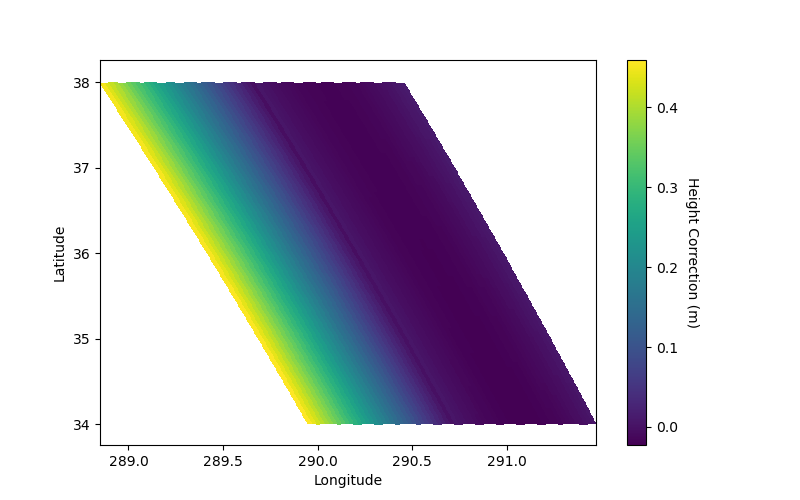

In [115]:
plt.clf()

fig,ax=plt.subplots(figsize=(8,5))
plot = ax.pcolormesh(ds_masked.longitude,ds_masked.latitude,ds_masked.height_cor_xover)
cbar = plt.colorbar(plot,ax=ax)

cbar.set_label('Height Correction (m)', rotation=270, labelpad=15)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

plt.show()

SSHA Karin 2 is the best quality to show the eddy

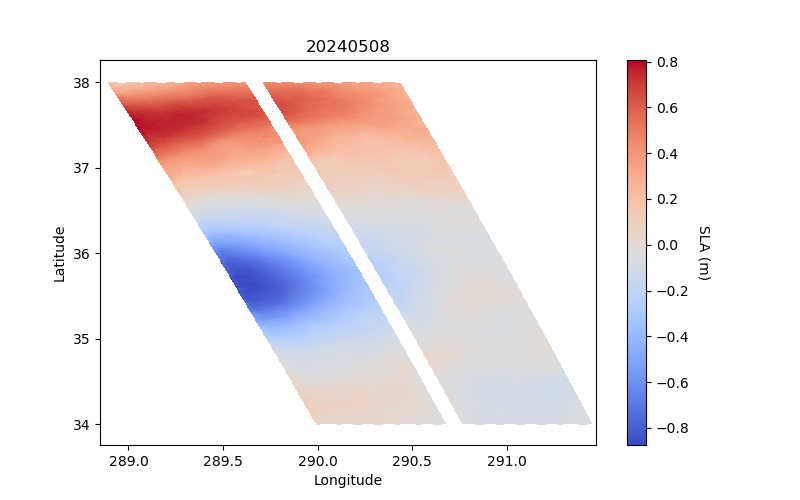

In [117]:
#plt.clf()

fig,ax=plt.subplots(figsize=(8,5))
plot = ax.pcolormesh(ds_masked.longitude,ds_masked.latitude,np.add(ds_masked.ssha_karin_2,ds_masked.height_cor_xover),cmap='coolwarm')#,vmin=-48,vmax=-43)
cbar = plt.colorbar(plot,ax=ax)

cbar.set_label('SLA (m)', rotation=270, labelpad=15)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title(date_requested)

plt.show()